In [ ]:
import matplotlib.pyplot as plt
from tbparse import SummaryReader
# log_dir = "/workspaces/data/MegaGen/UNet/unet_20250626-115229"
log_dir = "/workspaces/data/MegaGen/logs/brats2/unet1-tb1-e60" 
# log_dir2 = "/workspaces/data/MegaGen/LG2UNETR/unet_20250701-123155" 
reader = SummaryReader(log_dir)
# reader2 = SummaryReader(log_dir2)
df = reader.scalars
# df2 = reader2.scalars
print(df)

ValueError: File or directory not found: /workspaces/data/logs/brats2/unet1-tb1-e60

In [2]:
df.query("tag=='Dice/Train'").value

0      0.180637
1      0.518804
2      0.601117
3      0.579777
4      0.608623
         ...   
115    0.763535
116    0.782488
117    0.784243
118    0.788120
119    0.770155
Name: value, Length: 120, dtype: float64

In [3]:
df.tag.unique()

array(['Dice/Train', 'Dice/Val', 'IoU/Train', 'IoU/Val', 'Loss/Train',
       'Loss/Val'], dtype=object)

In [4]:


def plot_history(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title("Loss")

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history['train_dice'], label='Train Dice')
    plt.plot(epochs, history['val_dice'], label='Val Dice')
    plt.legend()
    plt.title("Dice Coefficient")

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history['train_iou'], label='Train IoU')
    plt.plot(epochs, history['val_iou'], label='Val IoU')
    plt.legend()
    plt.title("IoU")

    plt.tight_layout()
    plt.show()




In [5]:
history = {}


history['train_loss']= df.query("tag=='Loss/Train'").value
history['train_dice']= df.query("tag=='Dice/Train'").value
history['train_iou']= df.query("tag=='IoU/Train'").value
history['val_loss']=df.query("tag=='Loss/Val'").value
history['val_dice']=df.query("tag=='Dice/Val'").value
history['val_iou']=df.query("tag=='IoU/Val'").value

# Usage:
# plot_history(history)

In [6]:
history['train2_loss']= df2.query("tag=='Loss/Train'").value
history['train2_dice']= df2.query("tag=='Dice/Train'").value
history['train2_iou']= df2.query("tag=='IoU/Train'").value
history['val2_loss']=df2.query("tag=='Loss/Val'").value
history['val2_dice']=df2.query("tag=='Dice/Val'").value
history['val2_iou']=df2.query("tag=='IoU/Val'").value


Text(0.5, 1.0, 'Dice Coeff.')

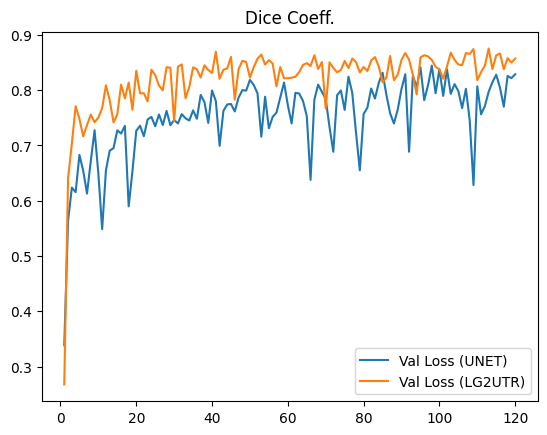

In [7]:
epochs = range(1, len(history['train_loss']) + 1)
plt.plot(epochs, history['val_dice'], label='Val Loss (UNET)')
plt.plot(epochs, history['val2_dice'], label='Val Loss (LG2UTR)')
plt.legend()
plt.title("Dice Coeff.")

In [17]:
#generate model's onnx graph
import torch
from UNet0 import UNet  # Assuming your model is defined in unet.py
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet(in_channels=3, out_channels=1) #.to(device)  # Initialize the model and move it to the device
model.load_state_dict(torch.load('unet-250627.pth')) #,map_location=device))
model.eval()  # Set the model to evaluation mode

dummy_input = torch.randn(1, 3, 256, 256)  # Adjust input size as needed
onnx_path = "unet0_model.onnx"

torch.onnx.export(model, dummy_input, onnx_path, export_params=True,
                  opset_version=11, do_constant_folding=True,
                  input_names=['input'], output_names=['output'])

print(f"ONNX model saved to {onnx_path}")

ONNX model saved to unet0_model.onnx
